In [8]:
import pandas as pd
import numpy as np
import matplotlib as plt 

In [9]:
df = pd.read_csv("/Users/filippo/ScrivaniaLocale/E-HealthProject/dataset.csv",index_col=0)
print(df.head(10))
print(df.shape)

   index   age  gender  education  marital  income  phq_1  phq_2  phq_3  \
0      0  42.0       1        5.0        1   18000      0    0.0    1.0   
1      1  51.0       3       18.0        1   23000      0    0.0    0.0   
2      2  40.0       0        8.0        1   10000      0    0.0    0.0   
3      3  19.0       0       25.0        5   31000      2    1.0    0.0   
4      4  42.0       2       13.0        1   40000      0    1.0    0.0   
5      5  48.0       2       13.0        1   11000      0    0.0    0.0   
6      6  33.0       0       22.0        2   36400      0    1.0    0.0   
7      7  55.0       2        8.0        2   28000      0    0.0    0.0   
8      8  40.0       3       18.0        3   12000      0    0.0    0.0   
9      9  46.0       2       13.0        1   35000      2    0.0    2.0   

   phq_4  ...  ccs_3  ccs_4  ccs_5  ccs_6  ccs_7  ccs_8  ccs_9  ccs_10  \
0      0  ...    5.0    1.0    4.0    3.0      0      4      0       0   
1      0  ...    3.0    6.

0


<AxesSubplot:>

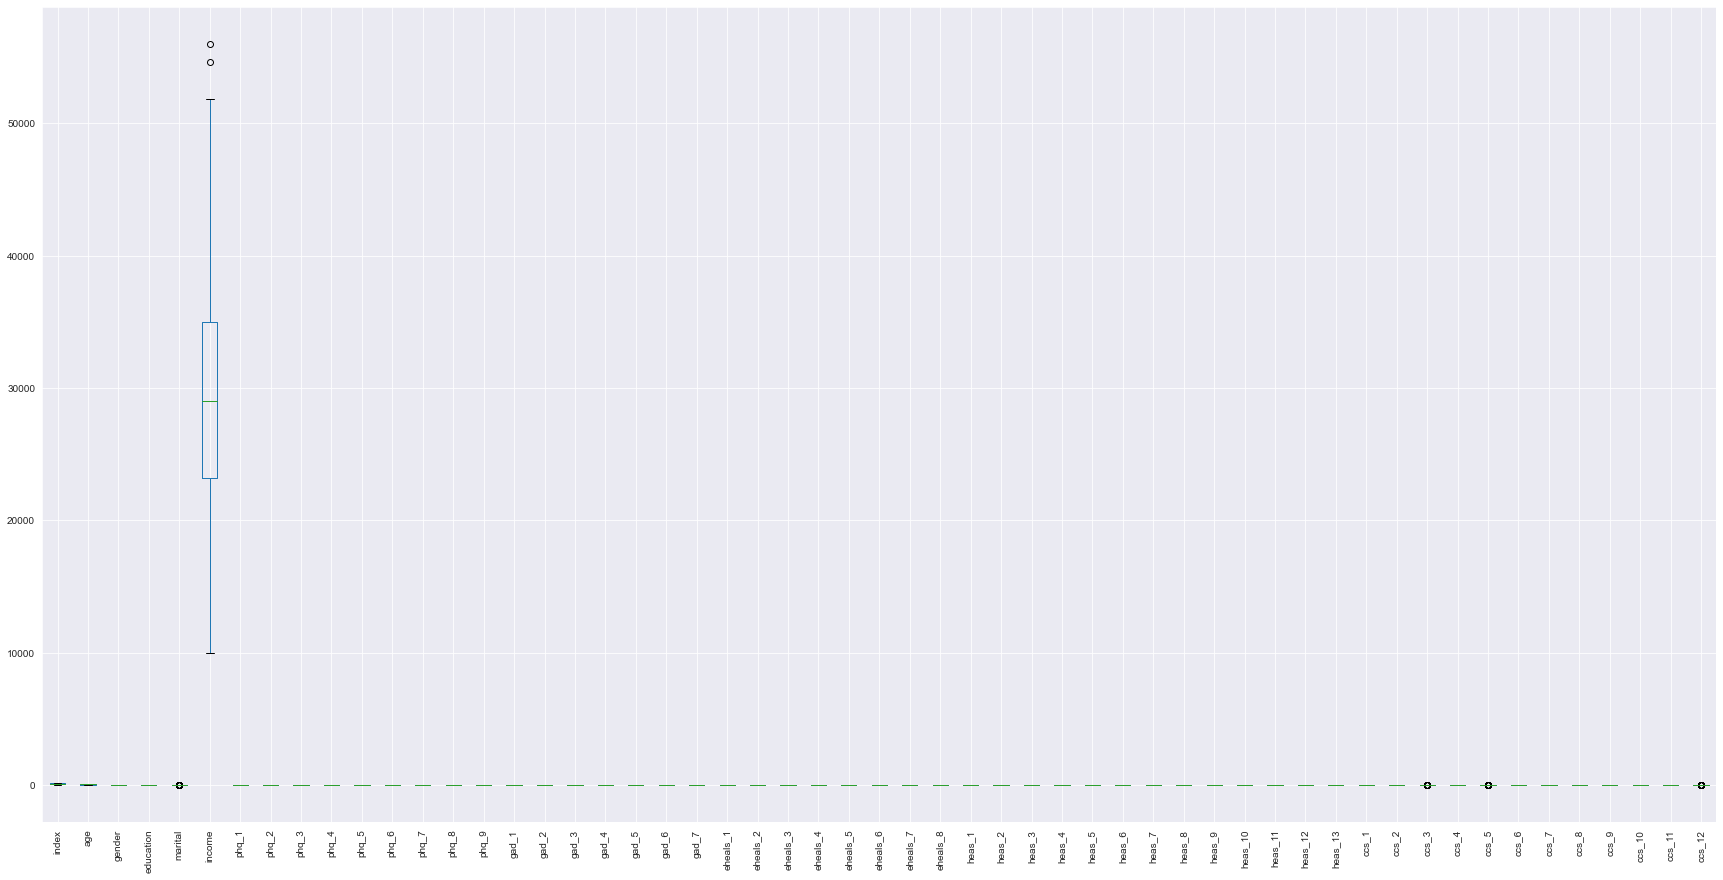

In [10]:
print(df.isna().sum().sum())

df.boxplot(rot=90,figsize=(30,15))

Adding the columns representing the score on each questionnaire

In [14]:
questionnaire_columns_phq = ['phq_1', 'phq_2', 'phq_3', 'phq_4', 'phq_5', 'phq_6', 'phq_7', 'phq_8', 'phq_9']
questionnaire_columns_gad = ['gad_1', 'gad_2', 'gad_3', 'gad_4', 'gad_5', 'gad_6', 'gad_7']
questionnaire_columns_eheals = ['eheals_1', 'eheals_2', 'eheals_3', 'eheals_4', 'eheals_5',
                                'eheals_6', 'eheals_7', 'eheals_8']
questionnaire_columns_heals = ['heas_1', 'heas_2', 'heas_3',
                               'heas_4', 'heas_5', 'heas_6', 'heas_7', 'heas_8',
                               'heas_9', 'heas_10','heas_11', 'heas_12', 'heas_13']
questionnaire_columns_ccs = ['ccs_1', 'ccs_2', 'ccs_4',
                               'ccs_5', 'ccs_8', 'ccs_9', 'ccs_10',
                               'ccs_11']

rowsSum = []

for row in range(0,150): # for each subject that responded to the questionnaire
    rowsSum.append(sum(df.loc[row,questionnaire_columns_phq]))
    
df['PHQ_sum'] = rowsSum

rowsSum = []

for row in range(0,150): # for each subject that responded to the questionnaire
    rowsSum.append(sum(df.loc[row,questionnaire_columns_gad]))
    
df['GAD_sum'] = rowsSum

rowsSum = []

for row in range(0,150): # for each subject that responded to the questionnaire
    rowsSum.append(sum(df.loc[row,questionnaire_columns_eheals]))
    
df['EHEALS_sum'] = rowsSum

rowsSum = []

for row in range(0,150): # for each subject that responded to the questionnaire
    rowsSum.append(sum(df.loc[row,questionnaire_columns_heals]))
    
df['HEALS_sum'] = rowsSum

rowsSum = []
for row in range(0,150): # for each subject that responded to the questionnaire
    currentSum = sum(df.loc[row,questionnaire_columns_ccs])
    currentSum += 6 - df.loc[row,'ccs_3']
    currentSum += 6 - df.loc[row,'ccs_6']
    currentSum += 6 - df.loc[row,'ccs_7']
    print(6 - df.loc[row,'ccs_12'])
    currentSum += 6 - df.loc[row,'ccs_12']
    
    rowsSum.append(currentSum)
    
df['CCS_sum'] = rowsSum

df.head()    

5
0
3
2
2
6
0
0
6
1
0
2
0
0
0
0
1
0
0
3
2
6
1
1
1
2
0
1
0
0
4
1
6
0
0
2
0
5
1
3
0
2
6
3
1
5
2
2
0
1
1
0
2
0
0
0
1
1
5
0
3
0
0
0
0
0
2
2
5
0
6
1
0
6
2
0
0
1
1
0
0
0
0
0
6
0
0
1
2
2
0
5
6
0
0
1
2
6
0
2
5
2
1
0
0
0
1
0
0
2
0
0
2
2
1
2
4
1
4
0
1
1
0
0
3
1
0
4
1
0
0
0
0
0
4
2
0
1
0
0
1
6
0
2
6
1
0
2
4
5


,index,age,gender,education,marital,income,phq_1,phq_2,phq_3,phq_4,...,ccs_8,ccs_9,ccs_10,ccs_11,ccs_12,PHQ_sum,GAD_sum,EHEALS_sum,HEALS_sum,CCS_sum
0,0,42.0,1,5.0,1,18000,0,0.0,1.0,0,...,4,0,0,3,1,2.0,0.0,17.0,8.0,33.0
1,1,51.0,3,18.0,1,23000,0,0.0,0.0,0,...,1,4,0,3,6,0.0,3.0,25.0,7.0,36.0
2,2,40.0,0,8.0,1,10000,0,0.0,0.0,0,...,0,2,1,6,3,1.0,4.0,20.0,2.0,38.0
3,3,19.0,0,25.0,5,31000,2,1.0,0.0,0,...,0,1,1,0,4,5.0,19.0,40.0,20.0,11.0
4,4,42.0,2,13.0,1,40000,0,1.0,0.0,0,...,1,1,0,5,4,7.0,6.0,29.0,16.0,22.0
